# ロケットシミュレーション

Text(0, 0.5, 'Y [m]')

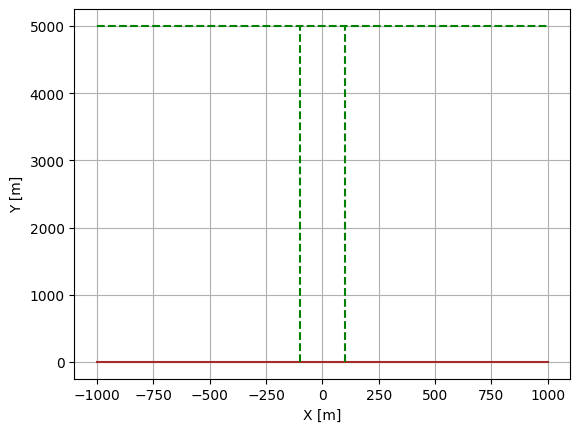

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# パラメータ
m = 1.0  # ロケットの質量
l = 1.0  # ロケットの長さ
g = 9.81 # 重力加速度

# 初期状態ベクトル [px, py, vx, vy, theta, omega]
initial_state = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

# シミュレーションの時間設定
dt = 0.01  # 時間刻み
T  = 100   # 終了時間
steps = int(T / dt)

def thruster_simulation(u):
    return u

# システムダイナミクスシミュレータ
def rocket_dynamics_simulator(state, thrust_x, thrust_y):
    dx_dt, dy_dt, theta, omega = state
    dtheta_dt = omega
    domega_dt = (g / l) * np.sin(theta) + (1 / (m * l**2)) * thrust_x
    dvy_dt = thrust_y * np.cos(theta) - g
    dvx_dt = thrust_y * np.sin(theta)
    if dy_dt < 0.0:
        dy_dt = 0.0
    return np.array([dx_dt, dy_dt, dvx_dt, dvy_dt, dtheta_dt, domega_dt])

# フィードバックゲイン(自由に変更してよい)
# 制御
K = np.array([-10, -10])
def control(state):
    # 水平、垂直方向の推力
    # 自由に変更してよい
    thrust_v = K.dot(state[4:])
    thrust_h = 1
    return thrust_v, thrust_h

# ログ用
orbit_vals = []
# 現在の状態を初期状態で設定
state = initial_state.copy()

# シミュレーションループ
for i in range(steps):
    # 制御入力 (変更してよい)
    thrust_x_in, thrust_y_in = control(state)
    thrust_x_out = thruster_simulation(thrust_x_in)
    thrust_y_out = thruster_simulation(thrust_y_in)

    # ダイナミクス(変更不可)
    dstate = rocket_dynamics_simulator(state[2:], thrust_x_out, thrust_y_out)

    # ステート更新(変更不可)
    state += dstate * dt

    # ログ (必要に応じて追加してよい)
    orbit_vals.append([state[0], state[1], state[4]])

orbit_vals = np.array(orbit_vals)

# 描画
plt.figure()
plt.plot([-1000,1000], [0,0], color="brown")
plt.plot([-1000,1000], [5000,5000], "g--")
plt.plot([-100,-100], [0,5000], "g--")
plt.plot([100,100], [0,5000], "g--")

plt.plot(orbit_vals[:,0], orbit_vals[:,1])
plt.grid(True)
plt.xlabel("X [m]")
plt.ylabel("Y [m]")

